# Import Dependencies

In [1]:
import dependencies
import soft_dependencies
import matplotlib.pyplot as plt

Python Version 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
Numpy Version 1.21.5
Scipy Version 1.7.3
Sklearn Version 1.0.2
Matplotlib Version 3.5.1
Line Profiler Version 3.3.1
Memory Profiler Version 0.58.0


In [2]:
from Scripts.generate_data import generate_Ys
from Scripts.scBiGLasso import scBiGLasso
from Scripts.anBiGLasso import anBiGLasso

In [3]:
# For timing results
import timeit

In [4]:
%load_ext autoreload
%autoreload 2

# Time scBiGLasso and anBiGLasso
**Note:**

'Easy' data comes from precision matrices generated from an
inverse Wishart distribution with many degrees of freedom.
Empirically, scBiGLasso converges very quickly.

'Hard' data comes from precision amtrices generated from an
inverse Wishart distribution with minimal degrees of freedom.
Empirically, scBiGLasso takes a long time to converge.

In [8]:
attempts = 10
def generate_timing_graph(sizes, attempts, df_scale, verbose=False):
    times_sc = []
    times_an = []
    for size in sizes:
        if verbose:
            print(f"Starting {size=}")
        times_sc.append(0)
        times_an.append(0)
        _, _, Ys = generate_Ys(
            m=(m:=100),
            n=(n:=size),
            p=(p:=size),
            expected_nonzero_psi=n**2 / 5,
            expected_nonzero_theta=p**2 / 5,
            structure="Kronecker Sum",
            df_scale=df_scale
        )
        def time_scBiGLasso():
            scBiGLasso(
                N = 100,
                eps = 10e-4,
                Ys = Ys,
                beta_1 = 0.01,
                beta_2 = 0.01,
                verbose = False
            )
        def time_anBiGLasso():
            anBiGLasso(
                Ys = Ys,
                beta_1 = 0.01,
                beta_2 = 0.01,
            )
        timer = timeit.Timer(time_scBiGLasso)
        times_sc[-1] = timer.timeit(attempts) / attempts
        timer = timeit.Timer(time_anBiGLasso)
        times_an[-1] = timer.timeit(attempts) / attempts
        if verbose:
            print(
                f"\tSc: {times_sc[-1]} Seconds \n\tAn: {times_an[-1]} Seconds"
            )
    return times_sc, times_an
print("Times on an 'easy' distribution")
sizes_for_easy = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sc_easy, an_easy = generate_timing_graph(
    sizes_for_easy,
    df_scale=10,
    verbose=True
)
print("Times on a 'hard' distribution")
sizes_for_hard = [10, 20, 30, 40, 50]
sc_hard, an_hard = generate_timing_graph(
    sizes_for_hard,
    attempts,
    df_scale=1,
    verbose=True
)

Times on an 'easy' distribution
Starting size=10
	Sc: 0.01874246659999983 Seconds 
	An: 0.0036246625000018184 Seconds
Starting size=20
	Sc: 0.04141550000000223 Seconds 
	An: 0.008487108399998533 Seconds
Starting size=30
	Sc: 0.0695673499999998 Seconds 
	An: 0.017621316699998602 Seconds
Starting size=40
	Sc: 0.09714212499999916 Seconds 
	An: 0.029552537500001107 Seconds
Starting size=50
	Sc: 0.1313434083000004 Seconds 
	An: 0.04720020000000034 Seconds
Starting size=60
	Sc: 0.1775484791999986 Seconds 
	An: 0.09197743330000208 Seconds
Starting size=70
	Sc: 0.22148246670000163 Seconds 
	An: 0.10549882920000186 Seconds
Starting size=80
	Sc: 0.27176464579999904 Seconds 
	An: 0.14144499159999951 Seconds
Starting size=90
	Sc: 0.34149664580000094 Seconds 
	An: 0.1979381332999992 Seconds
Starting size=100
	Sc: 0.4251747499999993 Seconds 
	An: 0.29195662090000096 Seconds
Times on a 'hard' distribution
Starting size=10
	Sc: 0.9588476499999985 Seconds 
	An: 0.003269741699998008 Seconds
Starting siz

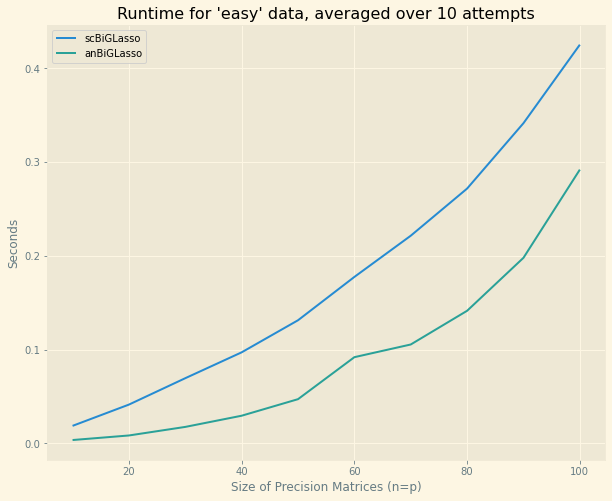

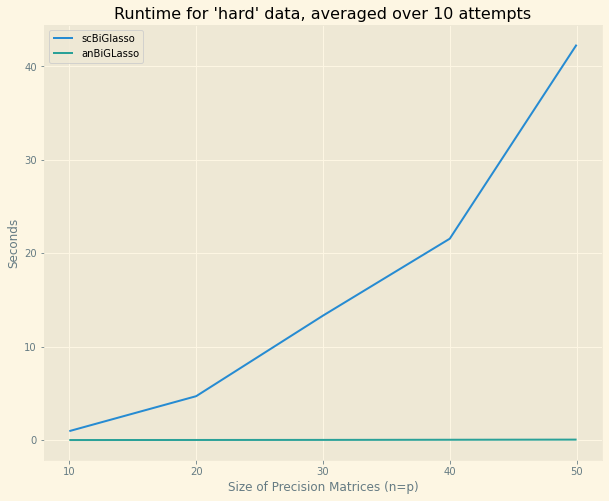

In [15]:
with plt.style.context('Solarize_Light2'):
        fig1, ax1 = plt.subplots(figsize=(10, 8))
        ax1.plot(sizes_for_easy, sc_easy, label='scBiGLasso')
        ax1.plot(sizes_for_easy, an_easy, label='anBiGLasso')
        ax1.set_xlabel("Size of Precision Matrices (n=p)")
        ax1.set_ylabel("Seconds")
        ax1.set_title(f"Runtime for 'easy' data, averaged over {attempts} attempts")
        ax1.legend()
        fig1.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Easy Data')
        fig2, ax2 = plt.subplots(figsize=(10, 8))
        ax2.plot(sizes_for_hard, sc_hard, label='scBiGlasso')
        ax2.plot(sizes_for_hard, an_hard, label='anBiGLasso')
        ax2.set_xlabel("Size of Precision Matrices (n=p)")
        ax2.set_ylabel("Seconds")
        ax2.set_xticks([10, 20, 30, 40, 50])
        ax2.set_title(f"Runtime for 'hard' data, averaged over {attempts} attempts")
        ax2.legend()
        fig2.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Hard Data')